In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
music_health_df = pd.read_csv("music&health.csv")

In [131]:
music_health_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [132]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

I can see that there are some missing values, that I will have to deal with in the second part of the section. 

I don't like the names of the columns with spaces, I havo to replace the spaces with _.

In [133]:
music_health_df.columns = [col.replace(" ", "_").replace("Frequency", "Freq").replace("[","").replace("]","") for col in music_health_df.columns]

In [134]:
music_health_df.drop(["Timestamp"], axis = 1, inplace = True)

In [135]:
music_health_df.Permissions.unique()

array(['I understand.'], dtype=object)

This column is useless, so I can drop it

In [136]:
music_health_df.drop(["Permissions"], axis = 1, inplace = True)

In [137]:
music_health_df.drop(["BPM"], axis = 1, inplace = True)

In [138]:
music_health_df.drop(["Foreign_languages"], axis = 1, inplace = True)

In [139]:
music_health_df.drop(["Primary_streaming_service"], axis = 1, inplace = True)

In [140]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    735 non-null    float64
 1   Hours_per_day          736 non-null    float64
 2   While_working          733 non-null    object 
 3   Instrumentalist        732 non-null    object 
 4   Composer               735 non-null    object 
 5   Fav_genre              736 non-null    object 
 6   Exploratory            736 non-null    object 
 7   Freq_Classical         736 non-null    object 
 8   Freq_Country           736 non-null    object 
 9   Freq_EDM               736 non-null    object 
 10  Freq_Folk              736 non-null    object 
 11  Freq_Gospel            736 non-null    object 
 12  Freq_Hip_hop           736 non-null    object 
 13  Freq_Jazz              736 non-null    object 
 14  Freq_K_pop             736 non-null    object 
 15  Freq_L

In [141]:
backup_dataset = music_health_df.copy() #I create a backup copy of the dataset

In [142]:
music_health_df[music_health_df["Music_effects"].isnull()].index

Int64Index([0, 1, 161, 168, 338, 441, 532, 561], dtype='int64')

In [143]:
music_health_df.drop(music_health_df[music_health_df["Music_effects"].isnull()].index, inplace = True) 
#I delete the rows that don't have a value in the last column, because they are irrelevant

In [144]:
music_health_df.head()

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
2,18.0,4.0,No,No,No,Video game music,No,Never,Never,Very frequently,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Yes,No,Yes,Jazz,Yes,Sometimes,Never,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,Yes,No,No,R&B,Yes,Never,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Rarely,Sometimes,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,3.0,Yes,Yes,No,Video game music,Yes,Sometimes,Never,Rarely,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [145]:
print(music_health_df[music_health_df["Age"].isnull()].index)
print(music_health_df[music_health_df["While_working"].isnull()].index)
print(music_health_df[music_health_df["Instrumentalist"].isnull()].index)

Int64Index([12], dtype='int64')
Int64Index([57, 426], dtype='int64')
Int64Index([223, 408, 572], dtype='int64')


In [146]:
music_health_df.drop(music_health_df[music_health_df["While_working"].isnull()].index, inplace = True)

In [147]:
music_health_df.drop(music_health_df[music_health_df["Instrumentalist"].isnull()].index, inplace = True)

In [148]:
#I replace the remaining missing value in the column "Age" with the mean of this column(rounded)
music_health_df["Age"].fillna(int(music_health_df["Age"].mean()), inplace = True)

In [149]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 2 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    723 non-null    float64
 1   Hours_per_day          723 non-null    float64
 2   While_working          723 non-null    object 
 3   Instrumentalist        723 non-null    object 
 4   Composer               723 non-null    object 
 5   Fav_genre              723 non-null    object 
 6   Exploratory            723 non-null    object 
 7   Freq_Classical         723 non-null    object 
 8   Freq_Country           723 non-null    object 
 9   Freq_EDM               723 non-null    object 
 10  Freq_Folk              723 non-null    object 
 11  Freq_Gospel            723 non-null    object 
 12  Freq_Hip_hop           723 non-null    object 
 13  Freq_Jazz              723 non-null    object 
 14  Freq_K_pop             723 non-null    object 
 15  Freq_L

Now I don't have missing values anymore.

In [150]:
music_health_df.describe()

,Age,Hours_per_day,Anxiety,Depression,Insomnia,OCD
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,25.149378,3.573375,5.838866,4.803596,3.728216,2.647303
std,11.928682,3.009494,2.786860,3.015567,3.082172,2.846868
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,10.000000,10.000000,10.000000,10.000000


In [151]:
music_health_df.Freq_Classical.unique()

array(['Never', 'Sometimes', 'Rarely', 'Very frequently'], dtype=object)

In [152]:
never_mask = music_health_df["Freq_Classical"] == "Never"

In [157]:
for i in music_health_df.columns[7:23]:
  music_health_df.loc[music_health_df[i] == "Never", i] = 0
  music_health_df.loc[music_health_df[i] == "Sometimes", i] = 1
  music_health_df.loc[music_health_df[i] == "Rarely", i] = 2
  music_health_df.loc[music_health_df[i] == "Very frequently", i] = 3

In [158]:
music_health_df[music_health_df.columns[7:23]] = music_health_df[music_health_df.columns[7:23]].apply(pd.to_numeric)

In [159]:
for i in music_health_df.columns[2:5]:
  music_health_df.loc[music_health_df[i] == "Yes", i] = 0
  music_health_df.loc[music_health_df[i] == "No", i] = 1

In [160]:
music_health_df[music_health_df.columns[2:5]] = music_health_df[music_health_df.columns[2:5]].apply(pd.to_numeric)

In [161]:
music_health_df.loc[music_health_df["Exploratory"] == "Yes", "Exploratory"] = 0
music_health_df.loc[music_health_df["Exploratory"] == "No", "Exploratory"] = 1

In [162]:
music_health_df["Exploratory"] = music_health_df["Exploratory"].apply(pd.to_numeric)

In [163]:
music_health_df.Music_effects.unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

In [164]:
music_health_df.loc[music_health_df["Music_effects"] == "No effect", "Music_effects"] = 0
music_health_df.loc[music_health_df["Music_effects"] == "Improve", "Music_effects"] = 1
music_health_df.loc[music_health_df["Music_effects"] == "Worsen", "Music_effects"] = 2

In [165]:
music_health_df["Music_effects"] = music_health_df["Music_effects"].apply(pd.to_numeric)

In [166]:
music_health_df.head()

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
2,18.0,4.0,1,1,1,Video game music,1,0,0,3,...,2,0,2,2,3,7.0,7.0,10.0,2.0,0
3,61.0,2.5,0,1,0,Jazz,0,1,0,0,...,1,1,0,0,0,9.0,7.0,3.0,3.0,1
4,18.0,4.0,0,1,1,R&B,0,0,0,2,...,1,3,3,0,2,7.0,2.0,5.0,9.0,1
5,18.0,5.0,0,0,0,Jazz,0,2,1,0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,1
6,18.0,3.0,0,0,1,Video game music,0,1,0,2,...,2,2,0,0,1,4.0,8.0,6.0,0.0,1


In [167]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 2 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    723 non-null    float64
 1   Hours_per_day          723 non-null    float64
 2   While_working          723 non-null    int64  
 3   Instrumentalist        723 non-null    int64  
 4   Composer               723 non-null    int64  
 5   Fav_genre              723 non-null    object 
 6   Exploratory            723 non-null    int64  
 7   Freq_Classical         723 non-null    int64  
 8   Freq_Country           723 non-null    int64  
 9   Freq_EDM               723 non-null    int64  
 10  Freq_Folk              723 non-null    int64  
 11  Freq_Gospel            723 non-null    int64  
 12  Freq_Hip_hop           723 non-null    int64  
 13  Freq_Jazz              723 non-null    int64  
 14  Freq_K_pop             723 non-null    int64  
 15  Freq_L

In [168]:
music_health_df.corr()

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,Freq_Folk,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
Age,1.000000,-0.038256,0.071911,0.123198,0.027556,0.179529,0.015545,0.055764,-0.097963,0.102084,...,-0.174475,0.026977,-0.185651,-0.001772,-0.240811,-0.183365,-0.114964,0.008056,-0.131284,-0.075848
Hours_per_day,-0.038256,1.000000,-0.283209,0.020859,-0.138357,-0.133662,-0.051203,0.020157,0.121870,0.091078,...,0.023077,0.036649,0.154863,0.099653,-0.005196,0.047222,0.098608,0.135561,0.113131,0.003657
While_working,0.071911,-0.283209,1.000000,0.080485,0.047078,0.139879,-0.029436,-0.051223,-0.144337,-0.057286,...,-0.088512,-0.100369,-0.088072,-0.021718,-0.082147,-0.036899,-0.055005,-0.033991,-0.085150,-0.127082
Instrumentalist,0.123198,0.020859,0.080485,1.000000,0.402519,0.070874,-0.178914,0.022394,0.064677,0.008331,...,0.076970,0.119952,0.032717,0.022580,0.011730,-0.031261,-0.006947,-0.031316,-0.020127,-0.078175
Composer,0.027556,-0.138357,0.047078,0.402519,1.000000,0.098986,-0.041722,-0.029330,-0.006809,-0.075405,...,0.051198,0.000157,-0.038890,-0.041356,0.024846,-0.003927,-0.054006,-0.094948,-0.015135,-0.069629
Exploratory,0.179529,-0.133662,0.139879,0.070874,0.098986,1.000000,-0.068541,-0.062862,-0.125191,-0.113367,...,-0.108590,-0.141258,-0.225510,-0.110197,0.002838,-0.019798,-0.059814,-0.057074,-0.029876,-0.116578
Freq_Classical,0.015545,-0.051203,-0.029436,-0.178914,-0.041722,-0.068541,1.000000,-0.024372,-0.036198,0.119767,...,0.009223,0.001389,-0.023740,-0.045769,0.121300,-0.067511,-0.029766,0.039188,-0.004295,-0.010678
Freq_Country,0.055764,0.020157,-0.051223,0.022394,-0.029330,-0.062862,-0.024372,1.000000,-0.002913,0.271777,...,0.051013,0.046744,-0.005629,0.087075,0.017422,0.039393,0.011688,-0.011119,0.041008,0.025061
Freq_EDM,-0.097963,0.121870,-0.144337,0.064677,-0.006809,-0.125191,-0.036198,-0.002913,1.000000,-0.009960,...,0.069018,0.138436,0.166909,0.062740,0.176396,0.063896,0.113910,0.085451,0.080149,0.051836
Freq_Folk,0.102084,0.091078,-0.057286,0.008331,-0.075405,-0.113367,0.119767,0.271777,-0.009960,1.000000,...,0.038964,0.063865,-0.026168,0.191780,0.102293,0.078242,0.082557,0.077923,0.022731,-0.015952


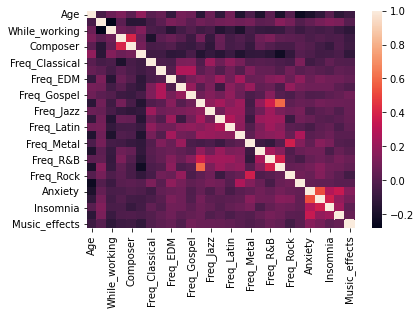

In [169]:
sns.heatmap(music_health_df.corr())

#Plots